In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [20]:
df = pd.read_csv("person_data.csv")

X = df[["Age","Height"]]
y = df["Weight"]

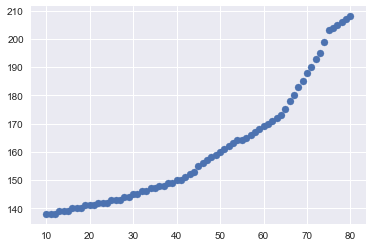

In [26]:
plt.scatter(df["Age"],df["Height"])

In [44]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_scaled = sc.fit_transform(X)
X_scaled.shape
type(X_scaled)

numpy.ndarray

In [35]:
np.mean(X_scaled, axis =0)
np.std(X_scaled, axis=0)

array([1., 1.])

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, random_state=2020)

X_pca = pca.fit_transform(X_scaled)

pca.explained_variance_ratio_ *100

array([97.36416205])

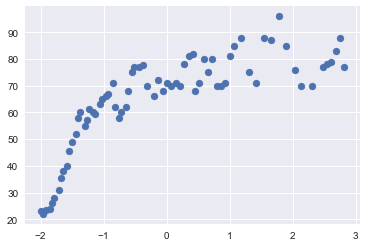

In [50]:
plt.scatter(X_pca,y)

In [51]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_pca,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

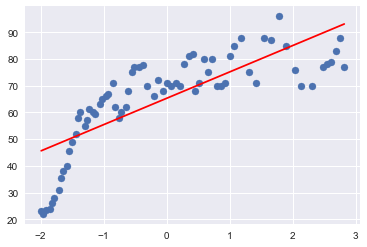

In [55]:
prediction = lm.predict(X_pca)

plt.scatter(X_pca,y)
plt.plot(X_pca, prediction, "r")

In [61]:
from sklearn.metrics import r2_score, mean_squared_error

rs = r2_score(y,prediction)
rs
ms = mean_squared_error(y, prediction)
ms1 = np.sqrt(ms)
ms1

0.6115501152335727

In [65]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree =4, include_bias=False)

X_poly = pf.fit_transform(X_pca)
X_poly.shape
type(X_poly)

numpy.ndarray

In [67]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_poly,y)
prediction2 = lr.predict(X_poly)

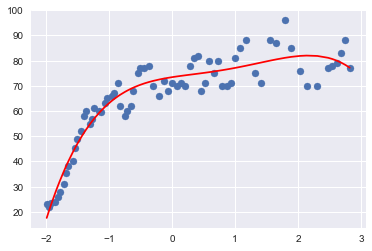

In [69]:
plt.scatter(X_pca,y)
plt.plot(X_pca, prediction2,"r")

In [74]:
rsq = r2_score(y, prediction2)
rsq
ms2 = mean_squared_error(y, prediction2)
mse2 = np.sqrt(ms2)
print(rsq)
print(mse2)

0.9017224665462797
5.52603911447949


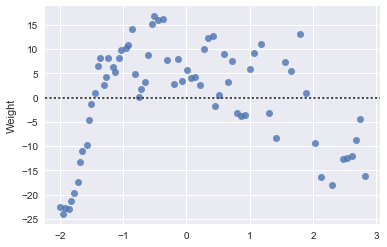

In [78]:
sns.residplot(X_pca,y)

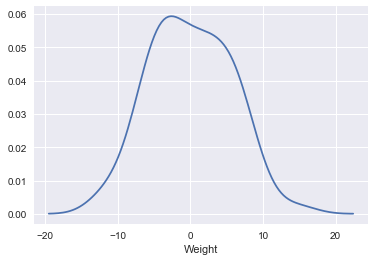

In [80]:
residuals = y - prediction2

sns.distplot(residuals,hist=False)

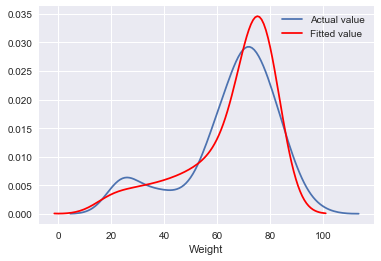

In [83]:
sns.distplot(y,hist=False, label="Actual value")
sns.distplot(prediction2,hist=False, label = "Fitted value", color = "r")